In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
def percentage_error(actual, predicted):
    """
    Function to calculate the percentage error if the actual value is zero so that the final MAPE will be infinity
    
    Parameters Taken: Actual test labels
    
    Return the the np array of residues
    """
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

In [3]:
def rmse_calculator(actual, predicted):
    """
    Function to calculate the Root Mean Square Error for regression problem
    """
    from math import sqrt
    squared_error = 0
    for i in range(actual.shape[0]):
        squared_error += (actual[i] - predicted[i])**2
    rmse = sqrt(squared_error/actual.shape[0])
    return rmse

In [4]:
def evaluate(model, test_features, test_labels):
    """
    Function to calculate accuracy
    
    Parameters Taken: Trained_model, Test features and test labels
    
    Returns
    RMSE, MAPE values
    """
    from sklearn import metrics
    predictions = model.predict(test_features)
    mape = 100 * np.mean(np.abs(percentage_error(np.asarray(test_labels), np.asarray(predictions))))
    RMSE = rmse_calculator(np.asarray(test_labels), np.asarray(predictions))
    print('Model Performance')
    print('RMSE: {}'.format(round(RMSE, 2)))
    print('MAPE = {}'.format(round(mape, 2)))
    print('r2: {}'.format(round(metrics.r2_score(test_labels, predictions), 2)))

In [5]:
#Loading Data
train=pd.read_csv('Graduate admissions.csv')

In [6]:
#total number of rows and columns
train.shape

(500, 9)

In [7]:
#Availability of Data
train.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
#Desciption about mean,max and min value
train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#Datatype of Columns in Pandas Data Frame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [10]:
#Dropping Serial No
train=train.drop(columns=['Serial No.'])

In [11]:
#Removing white spaces in column
train.columns = train.columns.str.replace(' ', '')

In [12]:
#Missing Value Investigation
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [13]:
#Number of Unique Elements [nunique]
for col in train.columns:
    print(col, train[col].nunique())

GREScore 49
TOEFLScore 29
UniversityRating 5
SOP 9
LOR 9
CGPA 184
Research 2
ChanceofAdmit 61


In [14]:
#Checking for Duplicate Rows
duplicate_rows=train[train.duplicated()]
print(duplicate_rows.shape)

(0, 8)


In [15]:
train = train.rename(columns={'Chance of Admit':'Chance_of_Admit'})

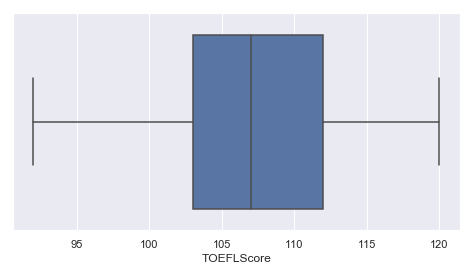

In [16]:
#Finding Outliers
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(train['TOEFLScore'])

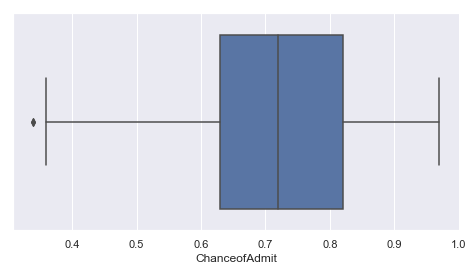

In [17]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(train['ChanceofAdmit'])
 

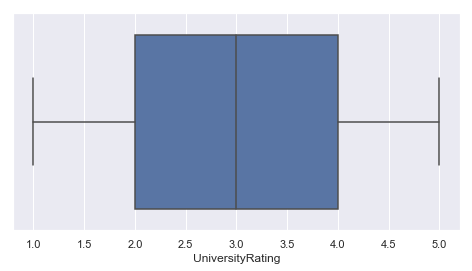

In [18]:
sns.boxplot(train['UniversityRating'])

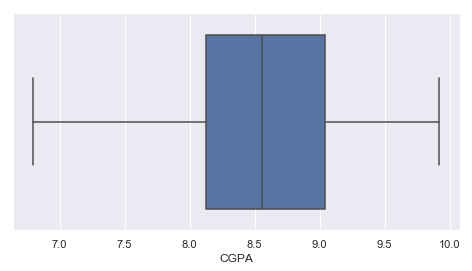

In [19]:
sns.boxplot(train['CGPA'])

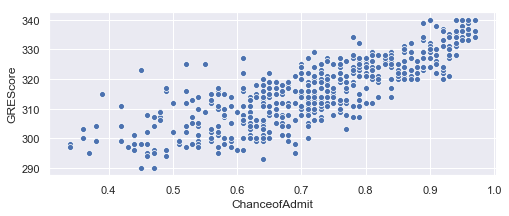

In [20]:
#Finding Outliers
sns.set(rc={'figure.figsize':(8,3)})
sns.scatterplot(x=train['ChanceofAdmit'],y=train['GREScore'])

In [21]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GREScore            17.0000
TOEFLScore           9.0000
UniversityRating     2.0000
SOP                  1.5000
LOR                  1.0000
CGPA                 0.9125
Research             1.0000
ChanceofAdmit        0.1900
dtype: float64


In [22]:
#Correlation
corr = train.corr(method='pearson')

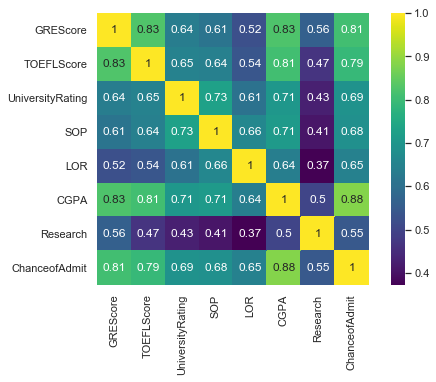

In [23]:
#Heatmap
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(corr, square=True, annot=True, cmap='viridis')

***Feature Engineering using Linear Regression***

In [24]:
#Feature Engineering 
features=[['GREScore','TOEFLScore','UniversityRating','SOP','LOR','CGPA','Research']]
target=['ChanceofAdmit']
# Separating out the features
x = train[['GREScore','TOEFLScore','UniversityRating','SOP','LOR','CGPA','Research']]
# Separating out the target
y = train[['ChanceofAdmit']]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(x,y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True]
[4 3 2 5 1 1 1]


c:\users\vishanthsurresh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          500 non-null    int64  
 1   TOEFLScore        500 non-null    int64  
 2   UniversityRating  500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [26]:
train.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

***Train and Test Split***

In [27]:
#Independent Variables
x=train.iloc[:,0:7]
#Dependent Variable
y=train.iloc[:,7]
#Train and Test Split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=42)
print("Train x shape: ", train_x.shape)
print("Test x shape: ", test_x.shape)
print("Train y shape: ", train_y.shape)
print("Test y shape: ", test_y.shape)

Train x shape:  (350, 7)
Test x shape:  (150, 7)
Train y shape:  (350,)
Test y shape:  (150,)


### Random Forest Regression ###

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(n_estimators = 1000,random_state=42)
regr.fit(x, y)
y_pred = regr.predict(test_x)

In [29]:
evaluate(regr, test_x, test_y)

Model Performance
RMSE: 0.02
MAPE = 2.73
r2: 0.97


In [30]:
y_pred

array([0.9262 , 0.81851, 0.47428, 0.75078, 0.75927, 0.88752, 0.47367,
       0.59937, 0.75075, 0.80518, 0.55234, 0.75428, 0.63333, 0.93251,
       0.86016, 0.50832, 0.85465, 0.63432, 0.54473, 0.56284, 0.66731,
       0.54567, 0.68851, 0.78031, 0.75069, 0.6639 , 0.93298, 0.82405,
       0.64655, 0.73063, 0.58847, 0.7145 , 0.5396 , 0.89055, 0.69526,
       0.72129, 0.60297, 0.93968, 0.6765 , 0.60602, 0.95837, 0.49221,
       0.69943, 0.86507, 0.91267, 0.63683, 0.92826, 0.8286 , 0.76553,
       0.9351 , 0.92156, 0.62821, 0.73718, 0.51107, 0.9388 , 0.61863,
       0.95953, 0.67401, 0.66567, 0.43007, 0.65973, 0.69979, 0.61923,
       0.6515 , 0.46259, 0.52399, 0.89348, 0.87947, 0.69757, 0.70865,
       0.63771, 0.77551, 0.68541, 0.56352, 0.58039, 0.62166, 0.83822,
       0.81356, 0.55936, 0.58774, 0.7528 , 0.90483, 0.64505, 0.85235,
       0.72216, 0.65192, 0.68104, 0.73244, 0.7623 , 0.67483, 0.73813,
       0.90901, 0.91375, 0.67485, 0.74358, 0.43422, 0.70826, 0.72285,
       0.68599, 0.58

In [31]:
errors = abs(y_pred-test_y)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
accuracy

97.27138919441134